In [1]:
import numpy as np
import pandas as pd
import os, os.path
import seaborn as sns

In [36]:
train_path = os.path.abspath(os.getcwd())+"/train.csv"
train_df = pd.read_csv(train_path)
scores_path = os.path.abspath(os.getcwd())+"/train_target_and_scores.csv"
scores_df = pd.read_csv(scores_path)
test_path = os.path.abspath(os.getcwd())+"/test.csv"
test_df = pd.read_csv(test_path)

/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
train_df.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0


In [38]:
test_df.head()

,id,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,17761448,team home,team away,2021-05-01 00:15:00,Division 1,755,False,9605704.0,30866250.0,2021-04-28 00:30:00,...,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0,755.0
1,17695487,team home,team away,2021-05-01 00:30:00,Liga MX,743,False,10319425.0,460370.0,2021-04-24 02:06:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0
2,17715496,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,440905.0,220998.0,2021-04-28 23:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1315.0,1315.0
3,17715493,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,21036670.0,1553238.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1746.0,1746.0
4,17715492,team home,team away,2021-05-01 01:00:00,Paulista A2,1314,False,3618158.0,37400444.0,2021-04-29 01:00:00,...,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0,1314.0


<AxesSubplot:xlabel='is_cup', ylabel='count'>

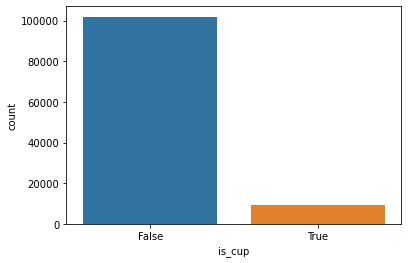

In [39]:
sns.countplot(x='is_cup', data=train_df)

<AxesSubplot:xlabel='target', ylabel='count'>

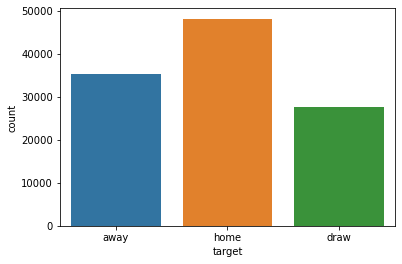

In [40]:
sns.countplot(x='target', data=scores_df)

In [41]:
train_df.set_index(keys='id', inplace=True)
test_df.set_index(keys='id', inplace=True)

In [42]:
# do preprocessing together so we combine train and test first.

realizing there is an extra column 'target' has to be dropped because the test dataset does not have it

In [43]:
train_df.drop(['target'], axis=1, inplace=True)

In [44]:
train_n = train_df.shape[0]
print(train_df.shape,test_df.shape)

(110938, 188) (72711, 188)


In [45]:
all_df = pd.concat((train_df, test_df))
all_df

,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,home_team_history_match_date_1,home_team_history_match_date_2,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
id,,,,,,,,,,,,,,,,,,,,,
11906497,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.0,468200.0,2019-11-26 00:10:00,2019-11-10 18:30:00,...,1122.0,642.0,636.0,636.0,636.0,1122.0,636.0,642.0,636.0,1122.0
11984383,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.0,22169161.0,2019-11-27 21:00:00,2019-11-24 01:00:00,...,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0,752.0
11983301,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.0,456313.0,2019-11-28 01:15:00,2019-11-21 01:30:00,...,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0,734.0
11983471,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.0,465797.0,2019-11-28 01:00:00,2019-11-23 03:10:00,...,743.0,743.0,743.0,743.0,743.0,743.0,743.0,743.0,746.0,743.0
11883005,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.0,426870.0,2019-11-27 18:00:00,2019-11-24 01:00:00,...,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0,705.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18450246,team home,team away,2021-11-30 22:00:00,Segunda Division,776,False,185004.0,37604899.0,2021-11-24 20:15:00,2021-11-18 01:15:00,...,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0,776.0
18164889,team home,team away,2021-11-30 22:15:00,Superliga,636,False,212417.0,37600717.0,2021-11-25 00:30:00,2021-11-20 22:15:00,...,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0,636.0
18449018,team home,team away,2021-11-30 22:30:00,Friendly International Women,1363,False,37429080.0,37428117.0,2021-10-23 21:00:00,2021-09-22 00:00:00,...,1363.0,1363.0,1126.0,1126.0,1126.0,1126.0,1126.0,1126.0,1363.0,1363.0


In [46]:
# convert is_cup to a binary variable
all_df['is_cup'] = all_df['is_cup'].map({False: 0, True: 1})
# convert target results to 0,1,2
scores_df = scores_df['target'].map({'home': 0, 'draw': 1, 'away': 2})

In [47]:
# remove all the coach and dates, team names and league name as they are not useful in training

In [48]:
all_df.drop(['home_team_name', 'away_team_name', 'league_name'], axis=1, inplace=True)
all_df.drop(all_df.filter(regex='date').columns, axis=1, inplace = True)
all_df.drop(all_df.filter(regex='coach').columns, axis=1, inplace = True)

In [49]:
scores_df

0         2
1         0
2         1
3         2
4         0
         ..
110933    1
110934    2
110935    1
110936    2
110937    0
Name: target, Length: 110938, dtype: int64

In [50]:
# reseparate train and test

In [51]:
X_train = all_df[:train_n].to_numpy()

In [52]:
X_test = all_df[train_n:].to_numpy()

In [53]:
y_train = scores_df.to_numpy()

## Model Training

In [61]:
all_df.isnull().any()

league_id                           False
is_cup                               True
home_team_history_is_play_home_1     True
home_team_history_is_play_home_2     True
home_team_history_is_play_home_3     True
                                    ...  
away_team_history_league_id_6        True
away_team_history_league_id_7        True
away_team_history_league_id_8        True
away_team_history_league_id_9        True
away_team_history_league_id_10       True
Length: 142, dtype: bool

In [71]:
# import packages

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [72]:
# Logistic Regression

lr_clf = LogisticRegression()
lr_score = cross_val_score(lr_clf, X_train, y_train, cv=5, scoring='accuracy')
print(lr_score.mean())

nan


/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/base.py", lin

In [73]:
# Ridge Regression

ridge_clf = RidgeClassifier()
ridge_score = cross_val_score(ridge_clf, X_train, y_train, cv=5, scoring='accuracy')
print(ridge_score.mean())

nan


/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py", line 1300, in fit
    X, y, sample_weight, Y = self._prepare_data(X, y, sample_weight, self.solver)
  File "/Users/martinlee/mambaforge/envs/general/li

In [74]:
# SVC

svc_clf = SVC(gamma='auto')
svc_score = cross_val_score(svc_clf, X_train, y_train, cv=5, scoring='accuracy')
print(svc_score.mean())

nan


/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/svm/_base.py", line 190, in fit
    X, y = self._validate_data(
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/base.py", line 581, in _val

In [75]:
#Decision Tree

tree_clf = DecisionTreeClassifier()
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')
print(tree_score.mean())

nan


/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 165, in fit
  

In [76]:
#KNeighbor

neigh_clf = KNeighborsClassifier()
neigh_score = cross_val_score(neigh_clf, X_train, y_train, cv=5, scoring='accuracy')
print(neigh_score.mean())

nan


/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/neighbors/_base.

In [77]:
#Randomforest

forest_clf = RandomForestClassifier()
forest_score = cross_val_score(forest_clf, X_train, y_train, cv=5, scoring='accuracy')
print(forest_score.mean())

nan


/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/base.py", line 581, 

In [78]:
#Adaboost

ada_clf = AdaBoostClassifier()
ada_score = cross_val_score(ada_clf, X_train, y_train, cv=5, scoring='accuracy')
print(ada_score.mean())

nan


/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 486, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/martinlee/mambaforge/envs/general/lib/python3.9/site-packages/sklearn

## Evaluation

In [70]:
# import packages

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [79]:
def model_evaluation(model, X=X_test, y_true=y_test):
    y_pred = model.predict(X)
    con_matrix = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return con_matrix, precision, recall, f1

NameError: name 'y_test' is not defined